In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import sys

## Highest Sea-Level Fluctuations in Bourgas bay
### (Statistical analysis using the Fréchet distribution)

### Abstract

Analysis of the highest (extreme) sea-level fluctuations is important for coast protection as well as for the design of the water-edge infrastructure. The Black Sea water levels change due to meteorological factors and wind setup. Maximum reported sea levels along the Bulgarian Black Sea coast are reported to happen under dominating North-East wind [1].
The genesis and nature of the sea surface fluctuations at the Bulgarian Black Sea coastal waters is the subject of a number of studies conducted by the Institute of Oceanology, Varna at the Bulgarian Academy of Science (IO-BAS).

Under the combined influence of various factors (tidal, hydrographical, and atmospheric) and their influence on the sea surface, a complex system of oscillating water movements is formed. It has been reported that the main variations at sea level in Bourgas Bay are due to the drift and tidal phenomena, baric (large periodic) processes (type *seiche*), and surf oscillations. The researches are based on data from long-term measurements of the sea levels by tide gauge stations [2]. The input data presented here are from the archives of IO-BAS.

The purpose of the present work is to analyse the highest sea-level variations in Bourgas bay using an appropriate probability distribution.

##### Notation
###### Main input parameters and coefficients:
bins_min (110) ; bins_max (165.0) ; bins_count (10) ; bins_interval (5.5) ; x_bin (np.array)

a_coeff ; k_coeff

###### Tables:
*inp_data* ; *groups*  ; *frechet_tab* ; *calculated* ; *t_r_tab* ; *our_results_edited* ; *cum_freq_results_edited* ; 
*comparison_io*

###### Figures:
*Highest Sea-level distribution*

*Occurrences and Cumulative*

*Fréchet (FT-II) c.d.f.*

*Fréchet (FT-II) p.d.f.*

*y = f(x)*

*p.d.f. (Fréchet distribution)*

*Calculated c.d.f. (Fréchet distribution)*

*c.d.f. with its confidence limits*

*Calculated vs. Ranked c.d.f.*

*Return period Tr, [y.] with its confidence limits*

*Sea Levels vs. Return period*

*"CumFreq" c.d.f.*

*"CumFreq" Return period*

*Return period vs. Highest Sea Levels*

*Sea-level Elevations vs. Return period (comparison with IO-BAS)*

### Pre-processing

The input data are provided in a *.CSV file that contains the annual highest sea levels registered in Bourgas Bay for the period of 52 years (from 1928 to 1980). They are recorded on the monthly basis, from which the maximum annual values are found.

In [3]:
# Reading the input *.csv file from Internet (GitHub):
path_file = "https://raw.githubusercontent.com/Geo2020/Sea-levels-in-Bourgas-Bay/main/data/high_waters.csv"
# instead of:
# path_file = "https://github.com/Geo2020/Sea-levels-in-Bourgas-Bay/blob/main/data/high_waters.csv"

inp_data = pd.read_csv(path_file, sep=",", header=1)
inp_data

,year,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,annually
0,1928,-,-,-,-,-,-,-,-,-,78.9,105,116,116
1,1929,125,111,117,110.8,111.7,113,109,126.5,105,120,96.1,137.5,137.5
2,1930,93.4,102,87.5,101.2,104.1,118,122.1,96.9,105.6,101,101,119.2,122.1
3,1931,111,121.9,117.3,117,118.2,123.7,126,117.5,125.2,116,147,118.2,147
4,1932,115.4,111.5,112.9,107.4,117.7,143.4,110.2,110,106,95.8,116.7,95.4,143.4
5,1933,89.9,100.3,98.3,118,106.8,126.2,116,116.8,110.6,107.3,141,131.3,141
6,1934,141.5,105.5,-,-,-,-,-,99.5,100.8,101.7,91,101.4,141.5
7,1935,118.8,98,114.1,94,114.4,114.5,108.4,96,94.2,99.4,116.5,118.3,118.8
8,1936,104.3,152,128.6,123.1,131.3,115.8,124,120.5,94.5,105.3,114,113.3,152
9,1937,123.4,117.3,135.2,135.6,124.9,121.1,125.9,111.3,108.2,129.1,124,133,135.6


From the above input data, we extract the annual highest sea levels (the column “annually” from the DataFrame) - this will be our variable to be analysed.

The sea levels are given in [cm] up to the Black Sea altitude system (BSS). BSS was introduced in Bulgaria in 1931, using a "zero" sea level as the initial level, determined by the average level of 892 round-the-clock observations of the tide gauge in Varna (68.17 cm at that time). With the initial "zero" adopted, the network is levelled in a unified geodetic net, and with the 
determined heights of the levelling benchmarks served as the main height base for the whole territory of the country. 
The subsequent levelling measurements were updated in 1952-53 and later related to the Baltic geodetic system (BS).
In BS, the heights are counted from the “zero” of the Kronstadt tide gauge, which represents the long-term average level of the Baltic Sea.

In [4]:
annual_levels = inp_data["annually"]
annual_levels
# print(high_levels.dtypes)  # object

0       116
1     137.5
2     122.1
3       147
4     143.4
5       141
6     141.5
7     118.8
8       152
9     135.6
10      133
11    132.2
12    141.5
13    154.5
14    139.9
15    125.7
16    141.9
17    128.4
18      146
19    136.4
20    135.3
21      110
22      114
23    136.8
24    142.4
25    143.2
26      128
27    146.5
28      149
29      152
30      154
31      140
32      147
33    134.3
34    149.8
35    153.1
36    133.6
37      145
38    153.5
39        -
40      149
41    154.1
42      165
43      155
44    152.9
45    153.5
46    155.8
47    153.5
48      155
49    154.4
50      154
51      159
52    137.7
Name: annually, dtype: object

From the above data (the annual highest sea levels), we exclude the lines with no real records.

In [5]:
# print(len(annual_levels))  # 53
levels_list = list()
for el in annual_levels:
    try:
        el = float(el)
        levels_list.append(el)
    except Exception:
        continue

# print(len(high_levels))  # 52
high_levels = np.array(levels_list)
# high_levels

### Determining the main statistics for analysis

For our statistical analysis, we should determine the main characteristics of the input sample. For this purpose, we will 
group the recorded data (annual sea levels) in 10 groups (bins) dividing the inputs sorted in ascending order from the minimum 
sea level to the maximum one.

Note: Some statistical methods recommend the count of bins to be 2, 5, 10, or 20, depending on the number of the sampling records (https://www.predictiveanalyticstoday.com/cumfreq/); if the latter is more than 50 (and less than 100), 10 bins are recommended, if the records are more than 100, 20 bins are to be used. In our case, we have 52 sampling records, thus 10 bins are to be taken.

In [6]:
bins_min = (np.math.floor(min(high_levels) * 10)) / 10
# print(bins_min)  # 110
bins_max = (np.math.ceil(max(high_levels) * 10)) / 10
# print(bins_max)  # 165.0
bins_count = 10
bins_interval = (bins_max - bins_min) / bins_count
# bins_interval  # 5.5

The Mean and Standard deviation (of a sample) are found as well:

In [7]:
high_levels_mean = np.mean(high_levels)
high_levels_std = np.std(high_levels, ddof=1)
print(f"Mean: {high_levels_mean}\nStandard deviation (of the Sample): {high_levels_std}")

Mean: 142.3230769230769
Standard deviation (of the Sample): 12.324495223081989


We can visualise the distribution of the sea-level inputs with a histogram plotting the Mean and Standard deviation of the sample inside.

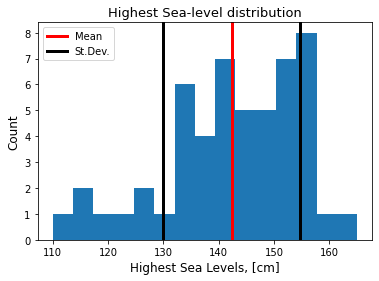

In [8]:
# plotting Histogram:
plt.hist(high_levels, bins=15)
plt.axvline(x=high_levels_mean, color='red', linewidth=3 , label='Mean')

plt.axvline(x=high_levels_mean + high_levels_std, color='black', linewidth=3 , label='St.Dev.')
plt.axvline(x=high_levels_mean - high_levels_std, color='black', linewidth=3)

plt.title('Highest Sea-level distribution', fontsize=13)
plt.xlabel('Highest Sea Levels, [cm]', fontsize=12)  # title on ‘x’ axis 
plt.ylabel('Count',fontsize=12)  # title on ‘y’ axis
plt.legend(loc="upper left")
plt.show()

We create a dictionary containing the count of recorded observation for each bin (numbered from 0 to 9), where the variable (highest sea level) is included in a given bin if the variable is bigger or equal to the minimum bin threshold and less than the maximum bin threshold (for example, the sea level 137.5 cm is to be in bin numerated '5' with limits: '137.5 - 143' (with 137.5 threshold included but 143 - excluded from the count).

In [9]:
bins_dict = {k: 0 for k in range(bins_count)}
# print(bins_dict)
events = len(high_levels)  # 52
for i in range(events):
    # print(high_levels[i])
    x = np.math.floor((high_levels[i] - bins_min) / bins_interval)
    if x >= len(bins_dict):
        x = len(bins_dict) - 1
    # print(x)
    bins_dict[x] += 1

# print(bins_dict)  # {0: 2, 1: 2, 2: 2, 3: 2, 4: 8, 5: 9, 6: 7, 7: 10, 8: 9, 9: 1}

Having the count of variables in each bin, we obtain the percentage of the event occurrences:

In [10]:
bins_percents = {k: (bins_dict[k] / events) for (k, v) in bins_dict.items()}
# print(f"bins_percents: {bins_percents}")

The determined statistics can be included in a Dataframe (using 'pandas' library):

In [11]:
groups = pd.DataFrame()

x_list = [bins_min + i * bins_interval for i in range(bins_count)]
# x_list
x_bin = np.array(x_list)
# x_bin
groups["X_bin"] = x_bin
# groups.T

groups["Occurrence"] = bins_percents.values()
occurences_array = np.array(groups["Occurrence"])
# occurences_array
# groups.T

In [12]:
cumulative = [0.0]
cumulative
for i in range(1, bins_count):
    cumulative.append(groups["Occurrence"][i-1] + cumulative[i-1])
# print(cumulative_list)
groups["Cumulative"] = cumulative
# groups["Cumulative"] = pd.DataFrame(cumulative_list)
cumulative_array = np.array(cumulative)
# print(cumulative_array)

groups["Exceedance"] = 1 - groups["Cumulative"]
# groups.T

In [13]:
# Additional variable - Tr (Return period):
t_r_gr = 1 / (1 - cumulative_array)
# t_r_gr
groups["Tr_bin"] = t_r_gr
# Shorten decimal precision in the DataFrame:
groups["Tr_bin"] = groups["Tr_bin"].map(lambda x: "{:,.1f}".format(x))

groups.T

,0,1,2,3,4,5,6,7,8,9
X_bin,110,115.5,121,126.5,132,137.5,143,148.5,154,159.5
Occurrence,0.0384615,0.0384615,0.0384615,0.0384615,0.153846,0.173077,0.134615,0.192308,0.173077,0.0192308
Cumulative,0,0.0384615,0.0769231,0.115385,0.153846,0.307692,0.480769,0.615385,0.807692,0.980769
Exceedance,1,0.961538,0.923077,0.884615,0.846154,0.692308,0.519231,0.384615,0.192308,0.0192308
Tr_bin,1.0,1.0,1.1,1.1,1.2,1.4,1.9,2.6,5.2,52.0


We plot a Bar chart for the statistics of the groups in the above table (since the bins are kind of categorical variables).

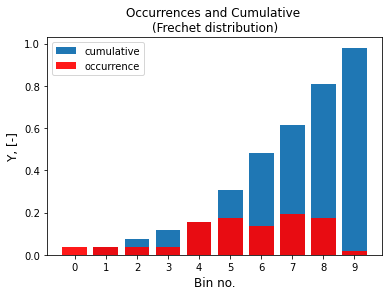

In [14]:
# plotting Bar chart (for categorial distribution):
plt.bar(groups.index, groups['Cumulative'], alpha=1.0, label="cumulative")
plt.bar(groups.index, groups['Occurrence'], alpha=0.9, color="r", label="occurrence")

plt.title(f"Occurrences and Cumulative \n(Frechet distribution)")
plt.xticks(range(10))
plt.xlabel("Bin no.", fontsize=12)
plt.ylabel("Y, [-]", fontsize=12)
plt.legend(loc="upper left")

plt.show()

### Fréchet distribution

The variations of the water levels are investigated in the Coastal Engineering Manual [3], and the main statistical distributions are found to be any of the following extreme value distributions: *Log-Pearson*, *Fréchet*, *Weibull*, or *Gumbel*. In work [4], the Fréchet distribution is considered by the authors for finding the probability of exceedance of the annual maximum water levels in Varna Lake. Below, we analyse the **Fréchet distribution**, also generalised as the *Fisher-Tippett Type II* **(FT-II)**. 

The basic description of this distribution is given in [Wikipedia]:

(https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution)

and the main distribution functions, namely c.d.f. and p.d.f. are in kind of:

[Fréchet (FT-II) c.d.f.]<img src=https://upload.wikimedia.org/wikipedia/commons/d/dd/Frechet_cdf.svg?download width="400">

[Fréchet (FT-II) p.d.f.]<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Frechet_pdf.svg/800px-Frechet_pdf.svg.png width="400">

In [3], the cumulative distribution function (c.d.f.) of the Fréchet distribution is shown in the form of: 
$$ c.d.f. = exp\left[ -\,\left(\frac{x}{A}\right)^{-k}\right] \;\;\;\;\; (1) $$

As for the Fréchet distribution probability density function (p.d.f.), it can be derived from the generalised formula in the technical literature (with the intercept coefficient equal to zero - see [Wikipedia] as well):
$$p.d.f. = \frac{k}{A}\left\{\left(\frac{x}{A}\right)^{-1-k}.exp\left[-\left(\frac{x}{A}\right)^{-k}\right]\right\}\;\;\;\;\;(2)$$

From equation (1), we can derive:
$$ ln(x) = -\,\frac{1}{k}.ln\left[ -ln\left(c.d.f.\right)\right] + ln(A) \;\;\;\;\; (3) $$

The equation (3) is a line equation with *slope* $ (−1/k) $ and *intercept* $ ln(A) $, which parameters are to be found with Regression analysis (least squares method) for arrays with *argument* $ ln[–ln(c.d.f.)] $ and *Y-values*: $ ln(x) $.
Below, we find these variables.

In [15]:
x_args = np.log(-np.log(cumulative))
# x_args
ln_x_array = np.log(x_bin)
# ln_x_array

<ipython-input-15-18edd8a1c759>:1: RuntimeWarning: divide by zero encountered in log
  x_args = np.log(-np.log(cumulative))


In [16]:
# Inserting the above variables in a new table:
frechet_tab = pd.DataFrame()
frechet_tab["ln[-ln(c.d.f.)]"] = x_args
frechet_tab["y=ln(X)"] = ln_x_array

frechet_tab.T

,0,1,2,3,4,5,6,7,8,9
ln[-ln(c.d.f.)],inf,1.181143,0.941939,0.769869,0.626902,0.164374,-0.311472,-0.722560,-1.543771,-3.941550
y=ln(X),4.70048,4.749271,4.795791,4.840242,4.882802,4.923624,4.962845,5.000585,5.036953,5.072044


### Polynomial interpolation method

We can determine the coefficients of the above line using the *polynomial interpolation method* with *degree* = 1 (*linear polynomial*).

In [17]:
x_coords = []
y_coords = []
for i in range(bins_count):
    if x_args[i] < sys.maxsize and -x_args[i] > -sys.maxsize and ln_x_array[i] < sys.maxsize and -ln_x_array[i] > -sys.maxsize:
        x_coords.append(x_args[i])
        y_coords.append(ln_x_array[i])

# print(x_coords)
# print(y_coords)

In [18]:
def find_polynomial_fit(x, y, degree):
    coeffs = np.polyfit(x, y, degree)  # (a, b, ...) - coeffs. of a polynomial function: a.x^n + b.x^(n-1) + ...
    polynomial_function = np.poly1d(coeffs)
    return polynomial_function

In [19]:
def find_polynomial_coeffs(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    return coeffs

The polynomial coefficients (line's slope and intercept) are calculated as below.

In [20]:
m_c_coeffs = find_polynomial_coeffs(x_coords, y_coords, 1)
m_coeff = m_c_coeffs[0]
print(f"coeff. m = {m_coeff}")
c_coeff = m_c_coeffs[1]
print(f"coeff. c = {c_coeff}")

coeff. m = -0.06013245510040879
coeff. c = 4.899296909490276


The linear polynomial interpolation of the dependence $ ln(x) $ as a function of $ ln[–ln(c.d.f.)] $ is visualised below.

In [21]:
def interpolate_polynomial(x_points, y_points, degree, min_x, max_x, title=''):
    """
    Interpolates a polynomial of the specified degree through the given points and plots it points 
    - a list of points (x, y) to plot degree - the polynomial degree min_x, max_x 
    - range of x values used to plot the interpolating polynomial
    """   
    x = x_points
    y = y_points
    polynomial_func = find_polynomial_fit(x, y, degree)  # calls another function returning a fitting polynomial
    
    # Scatter plot:
    plt.scatter(x, y, c='b')
    # Plot:
    x_poly = np.linspace(min_x, max_x, 5000)
    y_poly = polynomial_func(x_poly)
    plt.plot(x_poly, y_poly, c='r')
    
    plt.title(title, fontsize=14)
    plt.xlabel("x = ln[-ln(c.d.f.)]", fontsize=14)
    plt.ylabel("y = ln(x - B)", fontsize=13)
    plt.show()

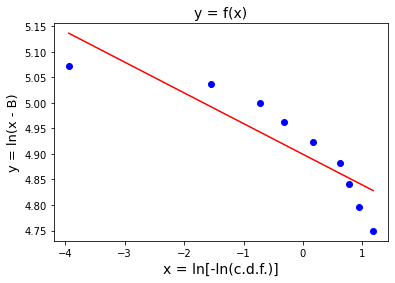

In [22]:
poly = interpolate_polynomial(x_coords, y_coords, 1, np.min(x_coords), np.max(x_coords), "y = f(x)")

#### Determining the coefficients A and k

Equation (3) represents a line equation with argument $ ln\left[ -ln\left(c.d.f.\right)\right] $, *slope*: $ -\frac{1}{k} $, and *intercept*: $ ln(A) $. 

The line coefficients from the polynomial interpolation method are found to be: *slope* $ m = -0.060 $, and *intercept* $ c = 4.899 $. 
Thus, we can derive from the above and eq.(3):
$$ A = exp\,(c) \;\;\;\;\; (4) $$ 
and $$ k = -\,\frac{1}{m} \;\;\;\;\; (5) $$
Thus:

In [23]:
a_coeff = np.exp(c_coeff)
print(f"coeff. A = {a_coeff}")
k_coeff = -1 / m_coeff
print(f"coeff. k = {k_coeff}")

coeff. A = 134.19539499966243
coeff. k = 16.629954628165546


### Determining c.d.f. and p.d.f. of the Fréchet distribution

Having the coefficients **A** and **k**, the main distribution functions can be found: **p.d.f.** - from eq.(2), and **c.d.f.** - from eq.(1).

#### p.d.f.

In [24]:
def calculate_pdf(x_array, a, k):
    pdf_function = k / a * ((x_array / a)**(-1 - k)) * np.exp(-(x_array /a)**(-k))
    return pdf_function

In [25]:
pdf_bin = calculate_pdf(x_bin, a_coeff, k_coeff)
# pdf_bin

In [26]:
# Table 'calculated' is created:
calculated = pd.DataFrame()

calculated["pdf"] = pdf_bin
calculated.T

,0,1,2,3,4,5,6,7,8,9
pdf,5.834526e-12,0.00001,0.002865,0.024308,0.044471,0.041409,0.028553,0.01726,0.009889,0.005571


The Fréchet p.d.f. is visualised below.

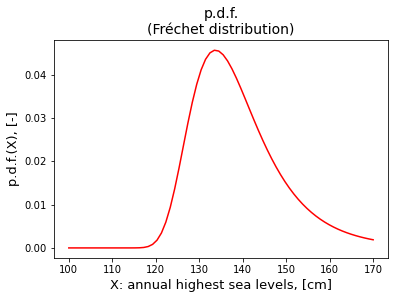

In [27]:
# Plot of p.d.f.:
x_plot = np.linspace(100, 170, 70)
pdf_70 = calculate_pdf(x_plot, a_coeff, k_coeff)  # length = 70

plt.plot(x_plot, pdf_70, c='r')
plt.title("p.d.f.\n(Fréchet distribution)", fontsize=14)
plt.xlabel("X: annual highest sea levels, [cm]", fontsize=13)
plt.ylabel("p.d.f.(X), [-]", fontsize=13)
plt.show()

Determining the c.d.f., it is recommended to consider its confidence limits (the lower and upper ones), also called **confidence belt**. In [5], the author uses the Student’s distribution value **t** to derive the formulas for the confidence limits. The value *t* corresponds to the level of certainty; when the count of observations **N** (the records of the annual sea levels) is more than 10, the **t**-value for 90% certainty is close to 1.7. For the exact **t**-value, a special tool *t-Tester Calculator* (freeware) can be used (https://www.waterlog.info/t-tester.htm ).

The proposed formulas are as follows:

    The lower confidence limit:
$$ (c.d.f.)_{lower} = \left[(c.d.f.) - 2\,t.(c.d.f.)\sqrt{(c.d.f.).\left(\frac{1-c.d.f.}{N}\right)}\right] \;\;\; (6) $$

    The upper confidence limit:
$$ (c.d.f.)_{upper} = \left[(c.d.f.) + 2\,t.(1 - c.d.f.)\sqrt{(c.d.f.).\left(\frac{1-c.d.f.}{N}\right)}\right] \;\;\; (7) $$

The calculated function values are inserted in a new table.

In [28]:
t_value = 1.7

In [29]:
def calculate_cdf(x_array, a, k):
    cdf_function = np.exp(-((x_array / a)**(-k)))
    return cdf_function

In [30]:
cdf_bin = calculate_cdf(x_bin, a_coeff, k_coeff)  # length = 10
calculated["c.d.f."] = cdf_bin
# calculated.T

The Fréchet c.d.f. can be visualised as follows.

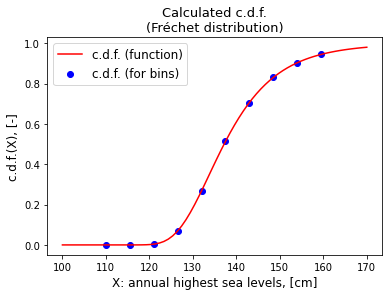

In [31]:
x_plot = np.linspace(100, 170, 70)
cdf_70 = calculate_cdf(x_plot, a_coeff, k_coeff)  # length = 70

# Scatter plot:
plt.scatter(x_bin, cdf_bin, label='c.d.f. (for bins)', c='b')
# Plot:
plt.plot(x_plot, cdf_70, label='c.d.f. (function)', c='r')

plt.title(f"Calculated c.d.f.\n(Fréchet distribution)", fontsize=13)
plt.xlabel("X: annual highest sea levels, [cm]", fontsize=12)
plt.ylabel("c.d.f.(X), [-]", fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

The confidence belt of the c.d.f. (the upper and lower limits) is calculated below. It should be underlined that the confidence level depends on the Student’s *t*-value; in our case, $ t = 1.7 $ is assigned, which corresponds to a 90% confidence level (see the explications above).

In [32]:
def calculate_cdf_limits(cdf):
    ''' This function calculates the c.d.f. confidence limits with level of confidence 
    dependeng on this one of the 't-value' '''
    cdf_lower = cdf - 2 * t_value * cdf * np.sqrt(cdf * (1 - cdf) / events)
    cdf_upper = cdf + 2 * t_value * (1 - cdf) * np.sqrt(cdf * (1 - cdf) / events)
    return (cdf_lower, cdf_upper)

In [33]:
cdf_low_bin = calculate_cdf_limits(cdf_bin)[0]  # length = 10
# print(cdf_low_bin)
cdf_up_bin = calculate_cdf_limits(cdf_bin)[1]  # length = 10
# print(cdf_up_bin)

In [34]:
calculated["c.d.f._lower"] = cdf_low_bin
calculated["c.d.f._upper"] = cdf_up_bin
calculated.T

,0,1,2,3,4,5,6,7,8,9
pdf,5.834526e-12,0.000010,0.002865,0.024308,0.044471,0.041409,0.028553,0.017260,0.009889,0.005571
c.d.f.,1.414474e-12,0.000005,0.003728,0.069253,0.268307,0.513106,0.706404,0.830645,0.903620,0.945027
c.d.f._lower,1.414473e-12,0.000005,0.003621,0.060963,0.212255,0.392184,0.554723,0.683753,0.777887,0.843468
c.d.f._upper,5.607585e-07,0.001106,0.032356,0.180668,0.421164,0.627851,0.769446,0.860594,0.917030,0.950935


The Fréchet c.d.f. and its confidence belt is visualised below.

In [35]:
x_cdf = np.linspace(100, 200, 100)
cdf_func = calculate_cdf(x_cdf, a_coeff, k_coeff)
cdf_low = calculate_cdf_limits(cdf_func)[0]  # length = 100
cdf_up = calculate_cdf_limits(cdf_func)[1]

# plot_function_and_limits(x=x_cdf, func=cdf_func, func_low=cdf_low, func_up=cdf_up, inp_color='green', inp_label="c.d.f.")

In [36]:
def plot_function_limits_and_scatter(x, func, func_low, func_up, scatter_ar, inp_color, inp_label=''):
    plt.figure(figsize = (7, 5))
    plt.plot(x, func, label=inp_label, color=inp_color, lw='2.8')  # the ‘label name’ is for the Legend
    plt.plot(x, func_low, label=f'{inp_label} lower limit', color=inp_color, ls=':')
    plt.plot(x, func_up, label=f'{inp_label} upper limit', color=inp_color, ls='-.')
    
    plt.scatter(x_bin, scatter_ar, c='black', label=f'{inp_label} for bins')  # a scatter plot with X, Y, color
    
    plt.title(f'{inp_label} with its confidence limits\n(Fréchet distribution)', fontsize=14)
    plt.xlabel('X: annual highest sea levels, [cm]', fontsize=14)
    plt.ylabel(f'{inp_label}, [-]', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)  # legend's location
    plt.show()

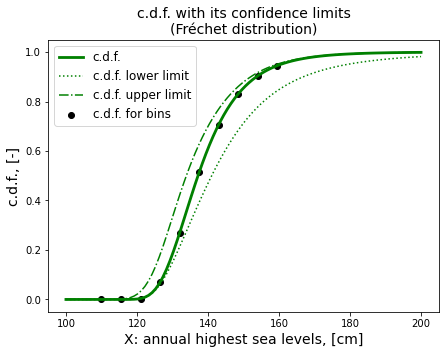

In [37]:
# Plot c.d.f. and its confidence belt:
scatter_ar = cdf_bin
plot_function_limits_and_scatter(x=x_cdf, func=cdf_func, func_low=cdf_low, func_up=cdf_up, scatter_ar= cdf_bin, 
                                 inp_color='g', inp_label="c.d.f.")

### Comparison with the Ranked c.d.f. (Weibull formula)

A classical method for calculating the c.d.f. is using the so-called “plotting position” formula, in which one of the arguments is the "**rank**" of the variable (*X-values*) in descending order, i.e. *rank* = 1 for the maximum value of *X* and so on up to the minimum *X* equal to the number of records (events) **N** for the input sample. The Coastal Engineering Manual [3] proposes the use of the **Weibull plotting position formula** for the NON-Exceedance probability (c.d.f.) "*because it is analytically simple and intuitively easily understood*":
$$ c.d.f. = 1 -\,\frac{r}{N + 1} \;\;\;\;\; (8) $$
, where **r** is the rank of the variable **X** in descending order.

Oosterbaan, R.J. describes the procedure of applying this formula in his "*Frequency analysis by Ranking of data*" [6]. For ranking in descending order, the suggested steps are as follows:
- Ranking the total number of the input data **N** in descending order according to their values *X*, the highest value first and the lowest value last;
- Assigning a serial number **r** to each value $X\,(X_r\, ,\, r = 1, 2, 3 ,..., n\,)$, the highest value being $X_1$ and the lowest being $X_n$ ;
- Dividing the rank **r** by the total number of observations plus 1 to obtain the **frequency of exceedance**.
Consequently, the **c.d.f.** is the **frequency of NON-exceedance**, which is:

$$ c.d.f. = 1 -\,Probability\: of\: Exceedance \;\;\;\;\; (9) $$

The result of the comparison of the calculated c.d.f. with the "ranked" c.d.f. is present in this section.

In [38]:
high_levels
ranked_levels = sorted(high_levels)  # <class 'list'>

cdf_rank = []
for i in range(len(ranked_levels)):
    rank = (events - i)
    cdf_rank.append(1 - rank / (events + 1))
# cdf_rank

In [39]:
# the calculated c.d.f. with its confidence belt:
x_pl = ranked_levels
# print(x_pl)
cdf_pl = calculate_cdf(x_pl, a_coeff, k_coeff)
cdf_low_pl = calculate_cdf_limits(cdf_pl)[0]
cdf_up_pl = calculate_cdf_limits(cdf_pl)[1]

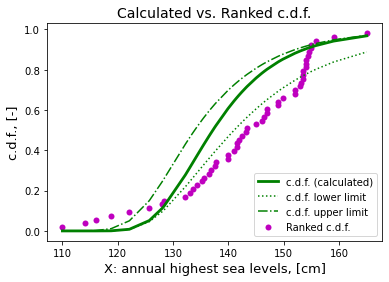

In [40]:
# Plotting the calculated and the "ranked" c.d.f.:
inp_label = "c.d.f."
plt.plot(x_pl, cdf_pl, label=f'{inp_label} (calculated)', color="g", lw='2.8')
plt.plot(x_pl, cdf_low_pl, label=f'{inp_label} lower limit', color="g", ls=':')
plt.plot(x_pl, cdf_up_pl, label=f'{inp_label} upper limit', color="g", ls='-.')

plt.scatter(x_pl, cdf_rank, c='m', lw='0', label=f'Ranked {inp_label}')  # a scatter plot

plt.title('Calculated vs. Ranked c.d.f.', fontsize=14)
plt.xlabel('X: annual highest sea levels, [cm]', fontsize=13)
plt.ylabel(f'{inp_label}, [-]', fontsize=13)
plt.legend(loc='lower right')  # legend's location
plt.show()

It should be noted that the *Ranked* method can be applied only for already known (recorded) data and *cannot be used for future prediction* of extreme events (let say, the Highest sea levels).

### Return period, Tr

The **Return period** (also called **recurrence interval**) is the average period of time between occurrences of a given event. It is a very important characteristic in the analysis of sea/ocean phenomena when the event (wave height, sea storm, water level) is extreme.

According to [6], the **Return period** is calculated as:
$$ T_r = \frac{1}{1 - c.d.f.} \;\;\;\;\; (10) $$
, where $T_r$ is found in years.

In [41]:
def calculate_t_r(cdf):
    t_r_function = 1 / (1 - cdf)
    return t_r_function

In [42]:
t_r_bin = calculate_t_r(cdf_bin)  # t_r_bin = 1 / (1 - cdf_bin)
# t_r_bin
calculated["Tr_years"] = t_r_bin
# Shorten decimal precision in the DataFrame:
calculated["Tr_years"] = calculated["Tr_years"].map(lambda x: "{:,.1f}".format(x))
# calculated.T

#### The confidence belt of the Return period

Oosterbaan, R.J. proposes the following formulas for the lower and upper limits of the Return period, [5]:

$$ Tr_{lower} = \left[Tr-0.33\,\left(\frac{1}{1-(c.d.f.)_{upper}}-\frac{1}{1-(c.d.f.)_{lower}}\right)\right] \;\;\;\;\; (11) $$

$$ Tr_{upper} = \left[Tr+0.67\,\left(\frac{1}{1-(c.d.f.)_{upper}}-\frac{1}{1-(c.d.f.)_{lower}}\right)\right] \;\;\;\;\; (12) $$



In [43]:
def calculate_t_r_limits(t_r, cdf_low, cdf_up):
    # Tr_lower for the min treshold (X_bin)
    t_r_lower = t_r - 0.33 * (1 / (1 - cdf_up) - 1 / (1 - cdf_low))  # t_r_low
    t_r_upper = t_r + 0.67 * (1 / (1 - cdf_up) - 1 / (1 - cdf_low))  # t_r_up
    return (t_r_lower, t_r_upper)

In [44]:
# Tr_lower for the min treshold (X_bin):
t_r_low_bin = calculate_t_r_limits(t_r_bin, cdf_low_bin, cdf_up_bin)[0]
# t_r_low_bin = t_r_bin - 0.33 * (1 / (1 - cdf_up_bin) - 1 / (1 - cdf_low_bin))
t_r_up_bin = calculate_t_r_limits(t_r_bin, cdf_low_bin, cdf_up_bin)[1]
# t_r_up_bin = t_r_bin + 0.67 * (1 / (1 - cdf_up_bin) - 1 / (1 - cdf_low_bin))

In [45]:
calculated["Tr_lower"] = t_r_low_bin
calculated["Tr_upper"] = t_r_up_bin
# Shorten decimal precision in the DataFrame:
calculated["Tr_lower"] = calculated["Tr_lower"].map(lambda x: "{:,.1f}".format(x))
# Shorten decimal precision in the DataFrame:
calculated["Tr_upper"] = calculated["Tr_upper"].map(lambda x: "{:,.1f}".format(x))

calculated.T

,0,1,2,3,4,5,6,7,8,9
pdf,5.83453e-12,9.50169e-06,0.00286523,0.0243079,0.0444714,0.0414094,0.0285527,0.0172603,0.0098893,0.00557114
c.d.f.,1.41447e-12,5.44448e-06,0.00372821,0.0692528,0.268307,0.513106,0.706404,0.830645,0.90362,0.945027
c.d.f._lower,1.41447e-12,5.43849e-06,0.00362108,0.0609629,0.212255,0.392184,0.554723,0.683753,0.777887,0.843468
c.d.f._upper,5.60758e-07,0.00110559,0.0323564,0.180668,0.421164,0.627851,0.769446,0.860594,0.91703,0.950935
Tr_years,1.0,1.0,1.0,1.1,1.4,2.1,3.4,5.9,10.4,18.2
Tr_lower,1.0,1.0,1.0,1.0,1.2,1.7,2.7,4.6,7.9,13.6
Tr_upper,1.0,1.0,1.0,1.2,1.7,2.8,4.8,8.6,15.4,27.6


The Return period graph with its confidence belt is plotted below. For comparison, the scatter plot of the calculated bin values from the grouped observed data is added there.

In [46]:
# Plot Tr and its confidence belt up to 200 cm Sea level:
x_t_r = np.linspace(100, 200, 100)
t_r_func = calculate_t_r(cdf_func)
t_r_low = calculate_t_r_limits(t_r_func, cdf_low, cdf_up)[0]  # length = 100
t_r_up = calculate_t_r_limits(t_r_func, cdf_low, cdf_up)[1]

# plot_function_and_limits(x=x_t_r, func=t_r_func, func_low=t_r_low, func_up=t_r_up, inp_color='blue', inp_label="Tr")

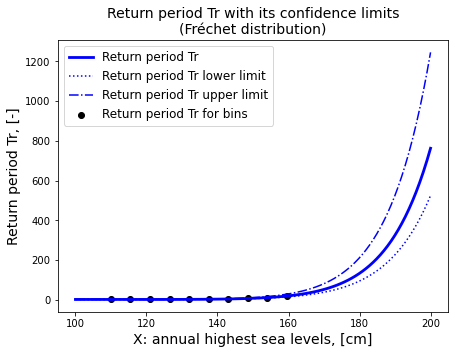

In [47]:
# Plotting Tr (as a scatter plot) of the bins values:
plot_function_limits_and_scatter(x=x_t_r, func=t_r_func, func_low=t_r_low, func_up=t_r_up, scatter_ar= t_r_bin, 
                                 inp_color='b', inp_label="Return period Tr")

### The dependence of the Highest Sea Level on the Return period

In Engineering practice, it is important to know the design criteria (parameters) as a function of the Return period. In other words, it is significant to predict the extreme values of the variables of interest (for instance, the highest water levels, wave heights, or sea storms/winds) for periods of recurrence of 50, 100, or 200 years. In mathematical meaning, the inverse function: $ X = f(T_r) $ should be determined.

The above dependence can be derived from equation (10) to be:
$$ c.d.f. = 1 - \frac{1}{T_r} \;\;\;\;\; (13) $$

Analogically,
$$ (c.d.f.)_{lower} = 1 - \frac{1}{Tr_{lower}} \;\;\;\;\; (14) $$
and
$$ (c.d.f.)_{upper} = 1 - \frac{1}{Tr_{upper}} \;\;\;\;\; (15) $$

In [48]:
t_r_year = np.array([1.05, 5, 10, 20, 25, 50, 100, 200])
cdf_year = 1 - 1 / t_r_year
# cdf_year
cdf_low_year = calculate_cdf_limits(cdf_year)[0]
# print(cdf_low_year)
cdf_up_year = calculate_cdf_limits(cdf_year)[1]
# print(cdf_up_year)

In [49]:
t_r_low_year = calculate_t_r_limits(t_r_year, cdf_low_year, cdf_up_year)[0]
# t_r_low_year
t_r_up_year = calculate_t_r_limits(t_r_year, cdf_low_year, cdf_up_year)[1]
# t_r_up_year

In [50]:
cdf_low_year = 1 - 1 / t_r_low_year
# cdf_low_year
cdf_up_year = 1 - 1 / t_r_up_year
# cdf_up_year

From eq.(3) is obvious that
$$ x = A\left[ -ln\left(c.d.f.\right)\right]^{-\,\frac{1}{k}} \;\;\;\;\; (16) $$
and, respectively:
$$ x_{lower} = A\left[ -ln\left((c.d.f.)_{lower}\right)\right]^{-\,\frac{1}{k}} \;\;\;\;\; (17) $$

$$ x_{upper} = A\left[ -ln\left((c.d.f.)_{upper}\right)\right]^{-\,\frac{1}{k}} \;\;\;\;\; (18) $$

In [51]:
x_year = a_coeff * (-np.log(cdf_year))**(-1 / k_coeff)
# x_year
x_low_year = a_coeff * (-np.log(cdf_low_year))**(-1 / k_coeff)
# x_low_year
x_up_year = a_coeff * (-np.log(cdf_up_year))**(-1 / k_coeff)
# x_up_year

Now, we can show the calculated **Highest Sea levels**, [cm] (with their confidence limits at a 90% confidence level) as function of the **Return period** $ T_r $, [year].

In [52]:
t_r_tab = pd.DataFrame()

t_r_tab["Tr, [y.]"] = t_r_year
t_r_tab["Tr_lower, [y.]"] = t_r_low_year
t_r_tab["Tr_upper, [y.]"] = t_r_up_year
t_r_tab["c.d.f., [-]"] = cdf_year
t_r_tab["cdf_low, [-]"] = cdf_low_year
t_r_tab["cdf_up, [-]"] = cdf_up_year

t_r_tab["X, [cm]"] = x_year
t_r_tab["X_lower, [cm]"] = x_low_year
t_r_tab["X_upper, [cm]"] = x_up_year

# Shorten decimal precision in the DataFrame:
t_r_tab["Tr, [y.]"] = t_r_tab["Tr, [y.]"].map(lambda x: "{:,.1f}".format(x))
t_r_tab["Tr_lower, [y.]"] = t_r_tab["Tr_lower, [y.]"].map(lambda x: "{:,.1f}".format(x))
t_r_tab["Tr_upper, [y.]"] = t_r_tab["Tr_upper, [y.]"].map(lambda x: "{:,.1f}".format(x))

t_r_tab["X, [cm]"] = t_r_tab["X, [cm]"].map(lambda x: "{:,.1f}".format(x))
t_r_tab["X_lower, [cm]"] = t_r_tab["X_lower, [cm]"].map(lambda x: "{:,.1f}".format(x))
t_r_tab["X_upper, [cm]"] = t_r_tab["X_upper, [cm]"].map(lambda x: "{:,.1f}".format(x))

t_r_tab.T

,0,1,2,3,4,5,6,7
"Tr, [y.]",1.1,5.0,10.0,20.0,25.0,50.0,100.0,200.0
"Tr_lower, [y.]",1.0,3.9,7.6,14.9,18.5,36.2,71.2,140.4
"Tr_upper, [y.]",1.1,7.2,14.9,30.4,38.2,78.0,158.4,321.0
"c.d.f., [-]",0.047619,0.8,0.9,0.95,0.96,0.98,0.99,0.995
"cdf_low, [-]",0.00950286,0.744048,0.868561,0.932794,0.945871,0.972399,0.985959,0.992877
"cdf_up, [-]",0.116636,0.86148,0.932688,0.967101,0.973856,0.987172,0.993688,0.996885
"X, [cm]",125.5,146.9,153.6,160.4,162.7,169.7,177.0,184.5
"X_lower, [cm]",122.3,144.4,151.0,157.5,159.7,166.4,173.4,180.6
"X_upper, [cm]",128.2,150.5,157.5,164.6,166.9,174.3,181.9,189.9


The above results are plotted below. In addition to the calculated values of the *Highest sea levels* as a function of the *Return period*, their “bin” values obtained from the grouped observed data are shown for comparison.

In [53]:
# Plotting parameters (for X = f(Tr)):
t_r_year_pl = np.linspace(1.05, 200, 200)
cdf_year_pl = 1 - 1 / t_r_year_pl
cdf_low_year_pl = calculate_cdf_limits(cdf_year_pl)[0]
cdf_up_year_pl = calculate_cdf_limits(cdf_year_pl)[1]

t_r_low_year_pl = calculate_t_r_limits(t_r_year_pl, cdf_low_year_pl, cdf_up_year_pl)[0]
t_r_up_year_pl = calculate_t_r_limits(t_r_year_pl, cdf_low_year_pl, cdf_up_year_pl)[1]

cdf_low_year_pl = 1 - 1 / t_r_low_year_pl
cdf_up_year_pl = 1 - 1 / t_r_up_year_pl

x_year_pl = a_coeff * (-np.log(cdf_year_pl))**(-1 / k_coeff)
x_low_year_pl = a_coeff * (-np.log(cdf_low_year_pl))**(-1 / k_coeff)
x_up_year_pl = a_coeff * (-np.log(cdf_up_year_pl))**(-1 / k_coeff)

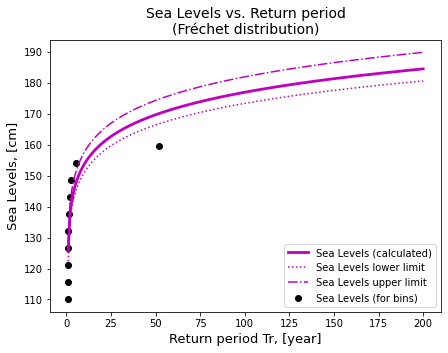

In [54]:
# Plot X = f(Tr)
inp_label = "Sea Levels"

plt.figure(figsize = (7, 5))

plt.plot(t_r_year_pl, x_year_pl, label=f'{inp_label} (calculated)', color="m", lw='2.8')
plt.plot(t_r_year_pl, x_low_year_pl, label=f'{inp_label} lower limit', color="m", ls=':')
plt.plot(t_r_year_pl, x_up_year_pl, label=f'{inp_label} upper limit', color="m", ls='-.')

plt.scatter(t_r_gr, x_bin, c='black', label=f'{inp_label} (for bins)')  # a scatter plot

plt.title(f'{inp_label} vs. Return period\n(Fréchet distribution)', fontsize=14)
plt.xlabel("Return period Tr, [year]", fontsize=13)
plt.ylabel(f'{inp_label}, [cm]', fontsize=13)
plt.legend(loc='lower right')  # legend's location
plt.show()

### Validation of the results with the software “CumFreq”

**”CumFreq”** is a freeware used as a powerful tool for *Cumulative frequency analysis* (from there is its abbreviation) – analysis of the frequency of occurrence of values of a phenomenon less than a reference value. The program calculates the cumulative (non-exceedance) frequency and does probability distribution fitting of data series. A brief description of the software is given in [Wikipedia]: https://en.wikipedia.org/wiki/CumFreq as well as on its site: https://www.predictiveanalyticstoday.com/cumfreq/ . The computer program provides the option to select the probability distribution to be fitted, such as the normal, lognormal, exponential, Gumbel, Weibull, Fréchet, Student distribution, and many others. Alternatively, it allows the determination of the *best fitting* probability distribution.

We made a comparative analysis of our results with those obtained from “CumFreq” using the Fréchet distribution (FT-II). It should be noticed that the generalised equation of the c.d.f. differs from eq.(1) by adding a free member (intercept) to the argument:

$$ c.d.f. = exp\left\{-\left[\frac{x - c}{exp\left(-b / a\right)}\right]^{a}\,\right\}\;\;\;\;\;(19) $$

Comparing eq. (19) with (1), it is obvious that if substitutions  $ exp(–b/a) = A $, $ a =\; –k $  are made in (19), we obtain an equation similar to (1) but with additional coefficient (intercept) **c** in the exponential numerator:
$$ c.d.f. = exp\left[ -\,\left(\frac{x - c}{A}\right)^{-k}\right] \;\;\;\;\; (20) $$

The latter is the generalised form of *the Fréchet c.d.f.* (see https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution).


It is to mention that not all of the outcomes from “*CumFreq*” are comparable with our results because of the different techniques used and generalised form of eq.(20). The analysed outcomes are the c.d.f. and Return period as plotted below. The “ranked” values for both variables are shown as well.

**"CumFreq" c.d.f.**:
<img src="https://raw.githubusercontent.com/Geo2020/Sea-levels-in-Bourgas-Bay/main/data/Bourgas_Frechet_cdf.bmp" style="max-height: 400px" />

It is visible that both c.d.f. show similar tendency but the c.d.f. values from “CumFreq” are a little lower than ours (the latter plotted in the section “Determining c.d.f. and p.d.f. of the Fréchet distribution”).

**"CumFreq" Return period**:
<img src="https://raw.githubusercontent.com/Geo2020/Sea-levels-in-Bourgas-Bay/main/data/Bourgas_Frechet_Tr.bmp" style="max-height: 400px" />

Regarding the Return period, we should re-scale our plot to have the same view for comparison.

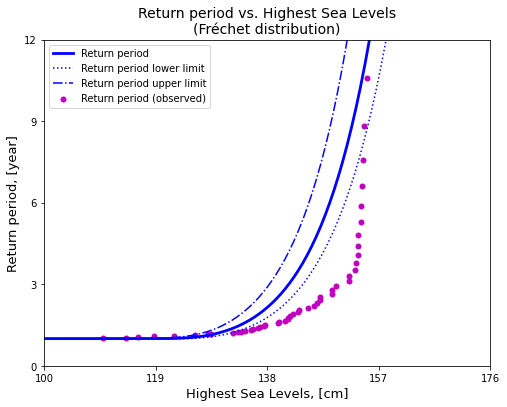

In [55]:
# Rescale the plot:
x_pl2 = np.linspace(100, 175, 200)
cdf_pl2 = calculate_cdf(x_pl2, a_coeff, k_coeff)
t_r_pl2 = calculate_t_r(cdf_pl2)
cdf_low_pl2 = calculate_cdf_limits(cdf_pl2)[0]
cdf_up_pl2 = calculate_cdf_limits(cdf_pl2)[1]
t_r_low_pl2 = calculate_t_r_limits(t_r_pl2, cdf_low_pl2, cdf_up_pl2)[0]
t_r_up_pl2 = calculate_t_r_limits(t_r_pl2, cdf_low_pl2, cdf_up_pl2)[1]

inp_label = "Return period"
plt.figure(figsize = (8, 6))

plt.plot(x_pl2, t_r_pl2, label=f'{inp_label}', color="b", lw='2.8')
plt.plot(x_pl2, t_r_low_pl2, label=f'{inp_label} lower limit', color="b", ls=':')
plt.plot(x_pl2, t_r_up_pl2, label=f'{inp_label} upper limit', color="b", ls='-.')
# Scatter plot:
plt.scatter(x_pl, 1 / (np.array(1) - cdf_rank), c='m', lw='0', label=f'{inp_label} (observed)')

plt.title(f'{inp_label} vs. Highest Sea Levels\n(Fréchet distribution)', fontsize=14)
plt.xlabel("Highest Sea Levels, [cm]", fontsize=13)
plt.ylabel(f'{inp_label}, [year]', fontsize=13)

plt.xlim(100, 175)
plt.ylim(0, 12)
plt.xticks(range(100, 177, 19))
plt.yticks(range(0, 13, 3))
plt.legend(loc='upper left')
plt.show()

Analogically to the c.d.f. tendency, the Return period from “CumFreq” shows lower values than ours.

The comparable variables are given in the tables below.

In [56]:
path_file = "https://raw.githubusercontent.com/Geo2020/Sea-levels-in-Bourgas-Bay/main/data/CumFreq.csv"
comparison_cum_freq = pd.read_csv(path_file, sep=";", header=None)
# comparison_cum_freq

Our results are shown below:

In [57]:
our_results = comparison_cum_freq[1:6]
# our_results
our_results_edited = our_results.T.round(decimals=pd.Series([0, 5, 1, 1, 1], index=our_results.index)).T
our_results_edited

,0,1,2,3,4,5,6,7,8
1,"Tr, [y.]:",5,10,20,25,30,50,75,100
2,"c.d.f., [-]:",0.8,0.9,0.95,0.96,0.966667,0.98,0.986667,0.99
3,X:,146.9,153.6,160.4,162.7,164.5,169.7,173.9,177
4,X_lower,144.4,151,157.5,159.7,161.4,166.4,170.4,173.4
5,X_upper,150.5,157.5,164.6,166.9,168.9,174.3,178.7,181.9


The outcomes of the software "CumFreq" are shown as well:

In [58]:
cum_freq_results = comparison_cum_freq[8:13]
# cum_freq_results
cum_freq_results_edited = cum_freq_results.T.round(decimals=pd.Series([0, 5, 1, 1, 1], index=cum_freq_results.index)).T
cum_freq_results_edited

,0,1,2,3,4,5,6,7,8
8,"Tr, [y.]:",5,10,20,25,30,50,75,100
9,"c.d.f., [-]:",0.8,0.9,0.95,0.96,0.966667,0.98,0.986667,0.99
10,CumFreq_X,153.3,161.9,170.3,172.9,175,181.1,185.8,189.2
11,CumFreq_X_lower,145.6,151.6,157.1,158.8,160.2,164,166.8,168.8
12,CumFreq_X_upper,155.9,163.8,171.5,174,176.1,181.9,186.4,189.7


Comparing the results of the above tables, it is seen that our Highest Sea levels as a function of the Return period are a little lower than those from “*CumFreq*”.

###### In general, the comparison of our results with the outcomes obtained from “*CumFreq*” shows a good correspondence.

### Comparison with the outcomes of IO-BAS

Additionally, we compared our outcomes with those calculated by the Institute of Oceanology (IO-BAS) and published in [2]. It is found in their investigation that the annual Highest Sea-level changes are not stationary because of the perennial variability of climatic processes, disturbances of water balance, coast subsidence, etc. To avoid this non-stationarity, they consider *the elevations of the sea levels above the average annual values* instead of their highest (extreme) levels [4].

We re-applied our technique with the new variables (the elevations of the sea levels instead of their maximum values) and compared the obtained results (the Highest sea-level elevations as a function of the Return period) with those of IO-BAS. The details of these calculations are not shown here; only the final results are present below. The outcomes of IO-BAS are given as “IO-BAS_1” and “IO-BAS_2” that stands for two sequences of data considered: with the initial input data (as ours, given at the beginning), and with correction of the above data after an extreme storm data (happened in February 1979). The results are present in the next table:

In [59]:
comparison_io = pd.DataFrame()
t_r_io = np.array([1, 5, 10, 25, 50, 100, 200, 250])
comparison_io["Tr, [year]"] = t_r_io
x_our_results = np.array([28.8, 49.9, 56.3, 65.6, 73.4, 82.1, 91.8, "-"])
comparison_io["our results"] = x_our_results
x_io_1 = np.array([27.6, 49.2, 54.6, 61.4, 66.4, 71.3, 76.3, 77.9])
comparison_io["IO-BAS_1"] = x_io_1
x_io_2 = np.array([28.5, 51.1, 58.9, 70.7, 80.9, 92.5, 106.8, 110.4])
comparison_io["IO-BAS_2"] = x_io_2
comparison_io.T

,0,1,2,3,4,5,6,7
"Tr, [year]",1,5,10,25,50,100,200,250
our results,28.8,49.9,56.3,65.6,73.4,82.1,91.8,-
IO-BAS_1,27.6,49.2,54.6,61.4,66.4,71.3,76.3,77.9
IO-BAS_2,28.5,51.1,58.9,70.7,80.9,92.5,106.8,110.4


The above results are visualised on the next plot.

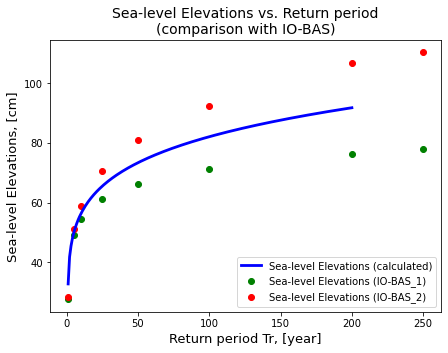

In [60]:
# Plotting parameters (for X = f(Tr)):
t_r_pl3 = np.linspace(1.05, 200, 200)
cdf_year_pl3 = 1 - 1 / t_r_pl3

# Coefficients calculated for Sea-level Elevations:
a3 = 39.23
k3 = 6.226
x_year_our = a3 * (-np.log(cdf_year_pl))**(-1 / k3)

# Plot X = f(Tr)
inp_label = "Sea-level Elevations"

plt.figure(figsize = (7, 5))

plt.plot(t_r_pl3, x_year_our, label=f'{inp_label} (calculated)', color="b", lw='2.8')

plt.scatter(t_r_io, x_io_1, c='green', label=f'{inp_label} (IO-BAS_1)')  # scatter plot 'IO-BAS_1'
plt.scatter(t_r_io, x_io_2, c='red', label=f'{inp_label} (IO-BAS_2)')  # scatter plot 'IO-BAS_1'

plt.title(f'{inp_label} vs. Return period\n(comparison with IO-BAS)', fontsize=14)
plt.xlabel("Return period Tr, [year]", fontsize=13)
plt.ylabel(f'{inp_label}, [cm]', fontsize=13)
plt.legend(loc='lower right')  # legend's location
plt.show()

###### *The comparison of the numbers in the last table shows that our Highest sea-level elevations are between those of IO-BAS obtained from the initial data set and the corrected one with extreme event data (catastrophic storm), which is quite acceptable.*

### Conclusion

In the present study, the annual maximum sea-level variations in Bourgas Bay are investigated. The **Fréchet distribution (Fisher-Tippett Type II)** is proposed for the mathematical description of the hydrographic phenomenon. Prediction of the *Return period* of the *Highest Sea levels* is derived as well as the inverse dependence.

For validation of the applied Fréchet simulation, comparisons with a similar technique (of the software “CumFreq”), and investigations (by IO-BAS) are performed; both comparisons show *good correspondences between our results and the related ones*.

Our proposed approach can also be applied for simulation of the Lowest sea-level fluctuations as well as for other extreme events: combinations of the highest/lowest water levels with waves, tides, or a *storm surge* (a rise of the sea level due to the action of wind stress on the water surface).

The developed methodology can be used in the engineering design of hydrotechnical structures and prevention against inundations and sea erosion at the coastal zones.

#### Future work

In the future, this work could be continued applying some other probability distributions recommended for prognostic of the extreme hydrographic / meteorological events: 
*Weibull* (https://en.wikipedia.org/wiki/Weibull_distribution), *Gumbel* (https://en.wikipedia.org/wiki/Gumbel_distribution), or/and *Log-Pеаrson (Type III)* distribution (https://en.wikipedia.org/wiki/Pearson_distribution ). 

Then, a comparative analysis of all studied distribution methods should be done in order to determine the best fitting to the input data.

### References

1. Архив на Институт по океанология, БАН, Варна, Банка данни за морските нива по Българското крайбрежие

2. Kostichkova, D., Belberov, Z., Trifonova, E., Grudeva, D. Sea Level Surface Variations in Bourgas Bay. Proceedings of the Institute of Oceanology, BAS, Vol.3: Marine Physics. Varna, 2001 (Костичкова Д., Белберов З., Трифонова Е., Грудева Д. Максимални морски нива в Бургаския залив, Трудове на Института по океанология, БАН, Том 3: Физика на морето. Варна, 2001).

3. Thompson, E. F. Hydrodynamic Analysis and Design Conditions. Coastal Engineering Manual, EM 1110-2-1100, U.S. Army Corps of Engineers, Washington, DC. Pt.II Coastal Hydrodynamics, Ch.II-8, 2002, 62 p.

4. Костичкова, Д., Чернева, Ж. Оценка на някои хидрологични елементи на Варненското езеро. Рационално използване и възстановяване на природните ресурси на Варненския регион. Варна, 1991, 168-174 p.

5. Oosterbaan, R.J. On cumulative frequency/probability distributions and confidence intervals.  Summary of “International Commission on Irrigation and Drainage, Special Technical Session: Economic Sspects of Flood Control and non Structural Measures, Dubrovnik, Yougoslavia, 1988”: www.waterlog.info/pdf/binomial.pdf 

6. Oosterbaan, R.J. Frequency and Regression Analysis of Hydrologic Data, Chapter 6 in: H.P.Ritzema (Ed.), Drainage Principles and Applications, Publication 16, second revised edition, 1994, International Institute for Land Reclamation and Improvement (ILRI), Wageningen, The Netherlands. ISBN 90 70754 3 39 (https://www.waterlog.info/pdf/freqtxt.pdf)

7. Personal communication with Prof. Oosterbaan, R.J. (Netherlands), July – Aug., 2015.
